# 주피터에서 돌렸습니다!   

# 코랩에서 돌아가려면 웹 드라이버 설정 을 바꿔야? 할것같ㅎ습니다

In [ ]:
from selenium import webdriver
from time import sleep
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
driver = webdriver.Chrome('C:\Chrome_Driver\chromedriver.exe')

driver.get('https://member.melon.com/muid/web/login/login_informM.htm')

In [ ]:
#아이디와 비밀번호
sleep(1)
driver.find_element_by_name('id').send_keys('여기다 아이디 치시면 됩니다')
sleep(1)
driver.find_element_by_name('pwd').send_keys('여기다 비밀번호 치시면 됩니다')
sleep(0.5)
driver.find_element_by_xpath('//*[@id="btnLogin"]').click()

이런식으로 indi_19 저장되어있습니다 

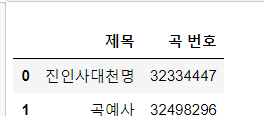

여기서 for 문으로 곡번호 마다 가져와서 했습니다


# 본인 파일에서 곡번호만 밑에 처럼 불러오게끔 trot19['곡 번호'] 를 수정하면 되실겁니다

In [ ]:
trot_19 = pd.read_csv('trot19금곡번호1-15000.csv',encoding='utf-8',index_col=0)
trot_19.head(2)

In [ ]:
song_n = 'https://www.melon.com/song/detail.htm?songId='

lyrics = []

for i in tqdm(trot_19['곡 번호']):
    url = song_n + str(i)
    
    driver.get(url) #페이지 주소 불러오기
    sleep(2) #StaleElementReferenceException 방지
    
    
    
    
    try:
        lyric = driver.find_element_by_class_name('lyric')
        lyrics.append(lyric.text)
    except NoSuchElementException:
        lyrics.append('가사 확인 불가')
        continue
    
    sleep(0.3)

trot_19['가사'] = lyrics
trot_19.to_csv('파일이름 자유롭게~~.csv',encoding='utf-8')
trot_19.tail(5)